##Data dictionary

* Name : 게임의 이름
* Platform : 게임이 지원되는 플랫폼의 이름
* Year : 게임이 출시된 연도
* Genre : 게임의 장르
* Publisher : 게임을 제작한 회사명
* NA_Sales : 북미지역의 출고량
* EU_Sales : 유럽지역의 출고량
* JP_Sales : 일본지역의 출고량
* Other_Sales : 기타지역의 출고량

##  Library & Korean Patch

In [45]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [46]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc("font", family='AppleGothic')
plt.rc('font', family='NanumBarunGothic')

## Data preprocessing

### Dataset 확인

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project/Session1/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
df.shape

(16598, 10)

### 결측치 확인 및 대체

In [5]:
# 결측치 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
# 결측치 변경 전 Year의 값을 조정
# 두 자리수의 Year를 네 자리수로 변경
for i in range(0,len(df['Year'])):
  if (df['Year'][i] >=0) & (df['Year'][i] <30):
    df['Year'][i] = df['Year'][i] + 2000
  elif (df['Year'][i] >50) & (df['Year'][i] <100):
    df['Year'][i] = df['Year'][i] + 1900
  else:
    continue

In [7]:
# Publisher 결측치 제거
df = df.dropna(subset=['Publisher'])
# Genre 결측치 최빈값으로 대체
df['Genre'].fillna(df['Genre'].mode()[0], inplace = True)
# Year 결측치 평균값으로 대체
df['Year'].fillna(int(df['Year'].mean()), inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

### Feature Engineering

In [9]:
# 인덱스 초기화 및 Unnamed: 0 컬럼 제거
df.reset_index(drop=True, inplace=True)
df = df.loc[:, 'Name':]

# Year int형으로 변환
df['Year'] = df['Year'].astype(int)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16535,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16536,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16537,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16538,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


* 자료형을 수치화

In [10]:
type(df.shape[0])

int

In [11]:
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0,0.01


In [12]:
df['NA_Sales'] = df['NA_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)

In [13]:
# 전체 출고량 컬럼 생성
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [16]:
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08


##Exploratory Data Analysis(EDA)

### 지역별 선호하는 게임장르

Text(0.5, 1.0, '이외의 모든지역 장르 트렌드')

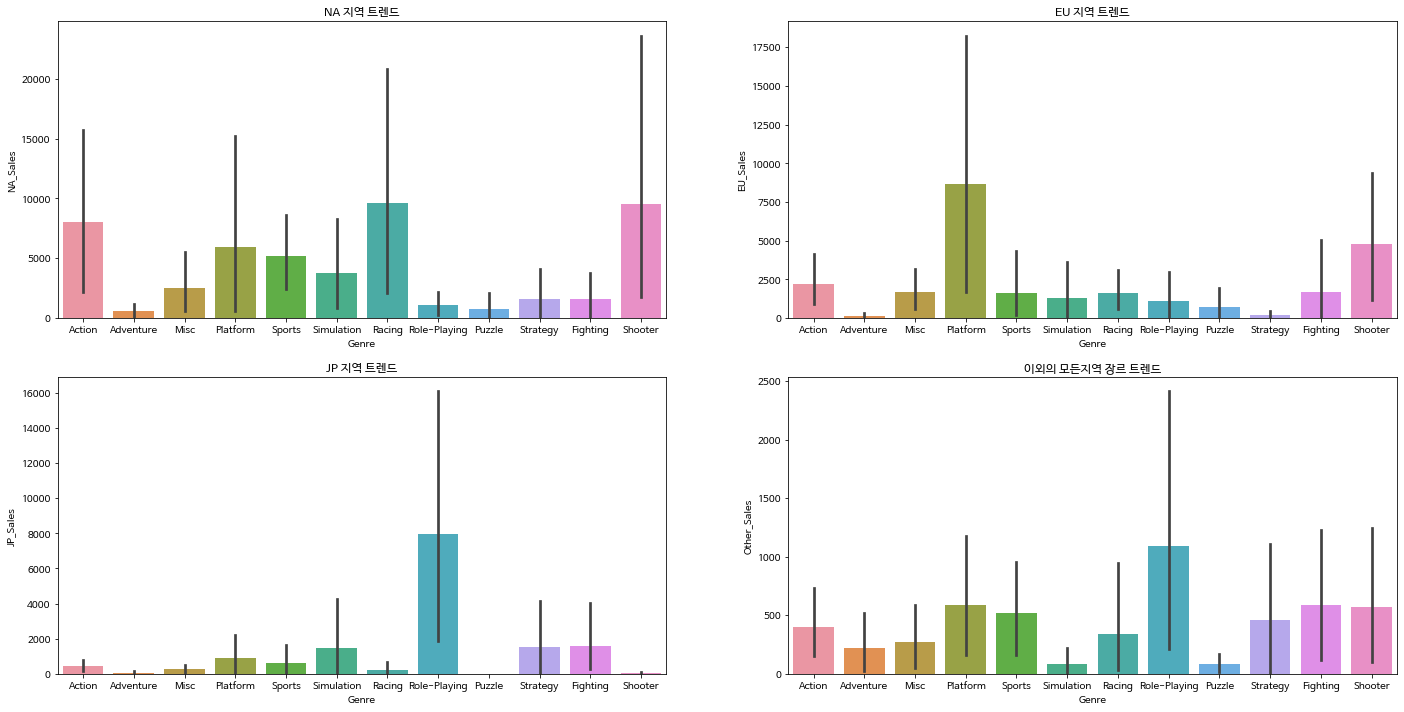

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(24, 12))
sns.barplot(data=df, x='Genre', y='NA_Sales', ax=ax[0, 0])
ax[0, 0].set_title('NA 지역 트렌드')
sns.barplot(data=df, x='Genre', y='EU_Sales', ax=ax[0, 1])
ax[0, 1].set_title('EU 지역 트렌드')
sns.barplot(data=df, x='Genre', y='JP_Sales', ax=ax[1, 0])
ax[1, 0].set_title('JP 지역 트렌드')
sns.barplot(data=df, x='Genre', y='Other_Sales', ax=ax[1, 1])
ax[1, 1].set_title('이외의 모든지역 장르 트렌드')

Text(0.5, 1.0, '모든 지역의 장르 트렌드')

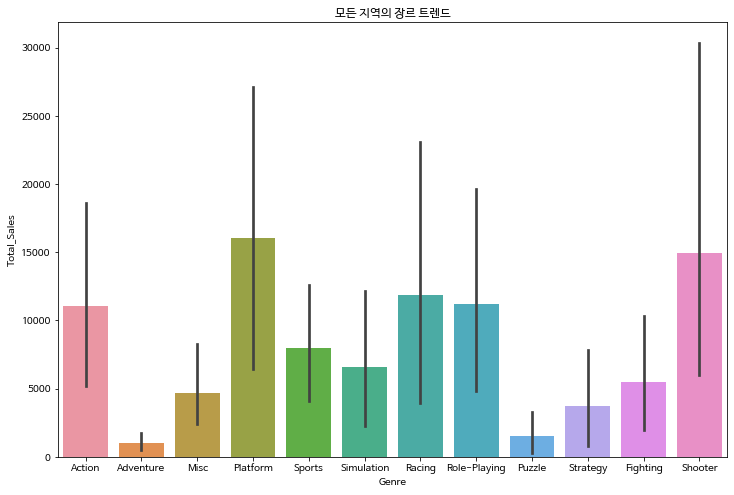

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Genre', y='Total_Sales')
plt.title('모든 지역의 장르 트렌드')

 * 각 지역별로 선호하는 장르는 각각 다르다는 것을 알 수 있다.   
 NA지역은 장르에 대한 편차가 생각보다 크지 않으며, 그중에서는 액션 및 레이싱, 슈팅 게임 장르를 선호한다.   
 EU지역은 플랫폼 게임을 선호하는 경향이 크며, JP지역은 롤플레잉 게임을 선호하는 비중이 높다.   
 이외의 모든 지역에서는 롤플레잉 장르를 선호하는 경향이 보인다.
 * 전체적으로 봤을때는 플랫폼과 슈팅, 액션, 레이싱, 롤플레잉 장르를 선호하는 경향을 보여준다.

### 연도별 게임 트렌드

**1. ~ 1990년도**

In [ ]:
df_year_90 = df[df['Year'] <= 1990]
df_year_90

Text(0.5, 1.0, '이외의 모든지역 장르 트렌드')

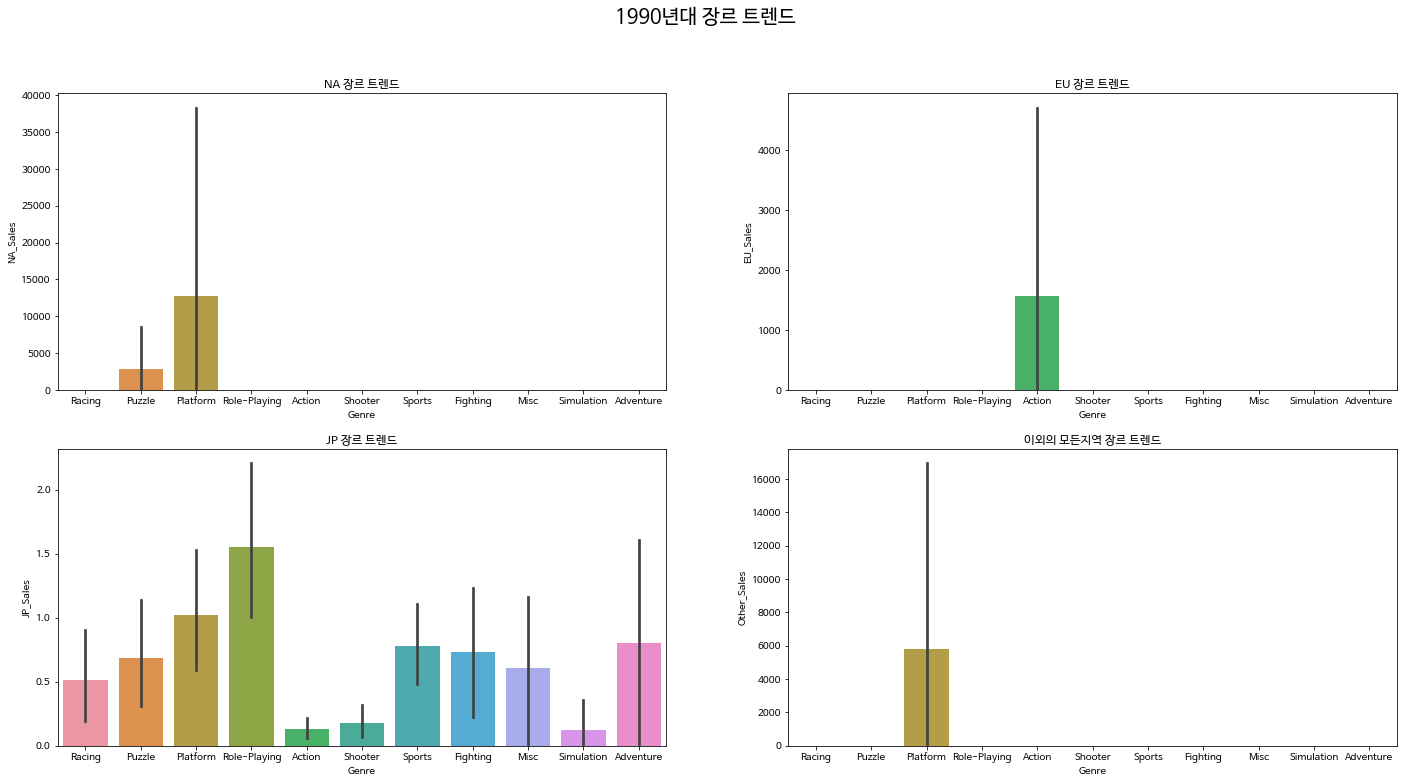

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(24, 12))
plt.suptitle('1990년대 장르 트렌드', fontsize=20)
sns.barplot(data=df_year_90, x='Genre', y='NA_Sales', ax=ax[0, 0])
ax[0, 0].set_title('NA 장르 트렌드')
sns.barplot(data=df_year_90, x='Genre', y='EU_Sales', ax=ax[0, 1])
ax[0, 1].set_title('EU 장르 트렌드')
sns.barplot(data=df_year_90, x='Genre', y='JP_Sales', ax=ax[1, 0])
ax[1, 0].set_title('JP 장르 트렌드')
sns.barplot(data=df_year_90, x='Genre', y='Other_Sales', ax=ax[1, 1])
ax[1, 1].set_title('이외의 모든지역 장르 트렌드')

Text(0.5, 1.0, '모든 지역의 장르 트렌드')

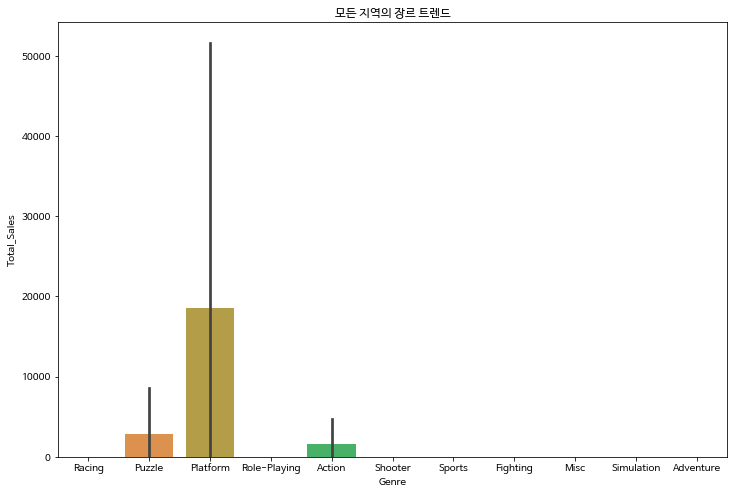

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_year_90, x='Genre', y='Total_Sales')
plt.title('모든 지역의 장르 트렌드')

 * 1990년도 이전에는 게임이라는 문화가 활성화가 잘 되어있지 않아보이고 플랫폼과 액션 두 가지 장르위주로만 보인다. 
 * JP지역은 장르가 다양해 보이나 판매량이 매우 낮아서 보이는 다양성이 있다. 하지만 여러 장르가 있다는 점이 눈에 띈다.

**2. 1990~2000년대**

In [ ]:
df_year_2000 = df[(df['Year'] > 1990) & (df['Year'] <= 2000)]
df_year_2000

Text(0.5, 1.0, '이외의 모든지역 장르 트렌드')

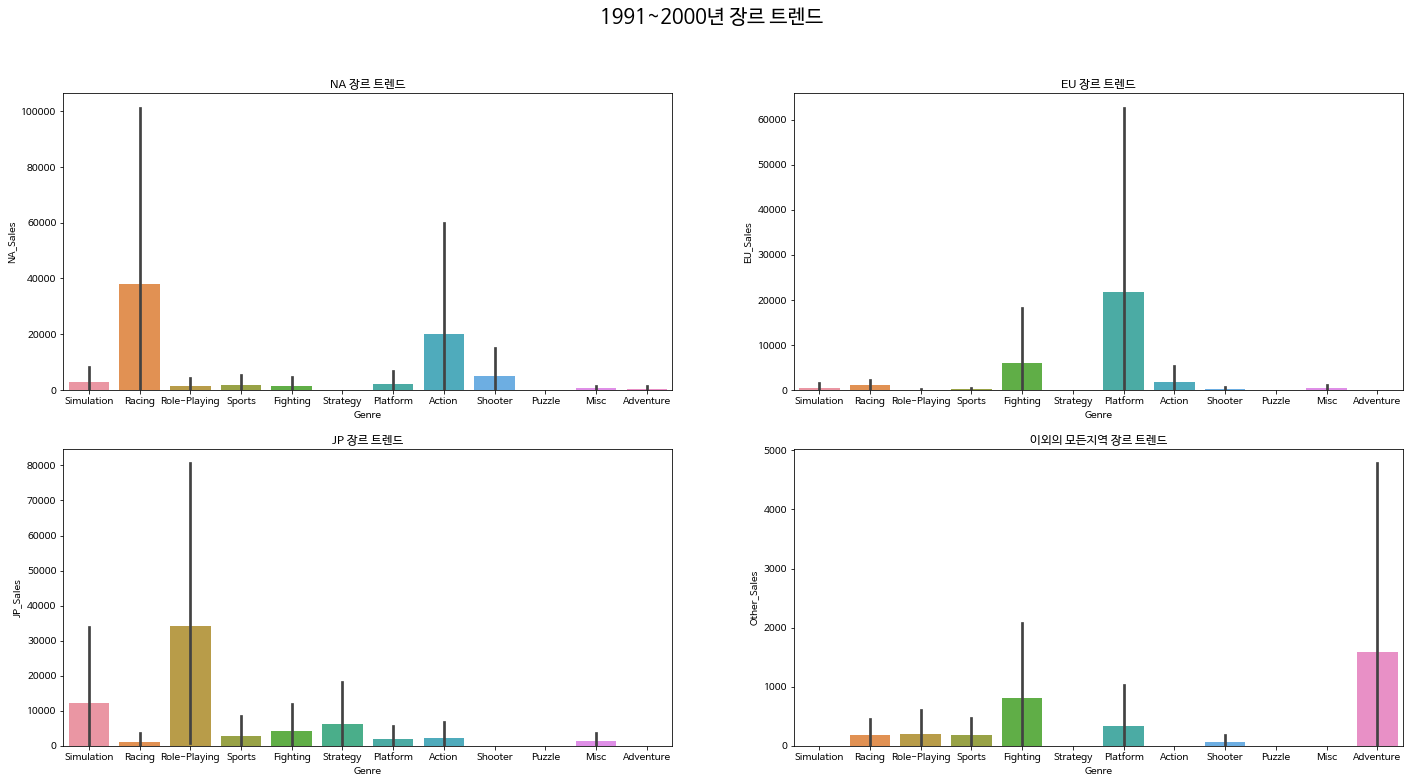

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(24, 12))
plt.suptitle('1991~2000년 장르 트렌드', fontsize=20)
sns.barplot(data=df_year_2000, x='Genre', y='NA_Sales', ax=ax[0, 0])
ax[0, 0].set_title('NA 장르 트렌드')
sns.barplot(data=df_year_2000, x='Genre', y='EU_Sales', ax=ax[0, 1])
ax[0, 1].set_title('EU 장르 트렌드')
sns.barplot(data=df_year_2000, x='Genre', y='JP_Sales', ax=ax[1, 0])
ax[1, 0].set_title('JP 장르 트렌드')
sns.barplot(data=df_year_2000, x='Genre', y='Other_Sales', ax=ax[1, 1])
ax[1, 1].set_title('이외의 모든지역 장르 트렌드')

Text(0.5, 1.0, '모든 지역의 장르 트렌드')

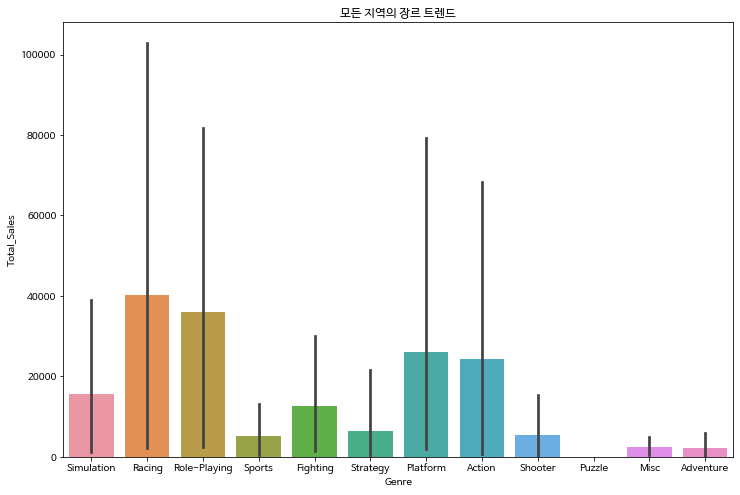

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_year_2000, x='Genre', y='Total_Sales')
plt.title('모든 지역의 장르 트렌드')

**3. 2000~2010년대**

In [25]:
df_year_2010 = df[(df['Year'] > 2000) & (df['Year'] <= 2010)]
df_year_2010

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16532,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,0.05
16533,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,80000.00,80004.45
16534,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02
16535,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20


Text(0.5, 1.0, '이외의 모든지역 장르 트렌드')

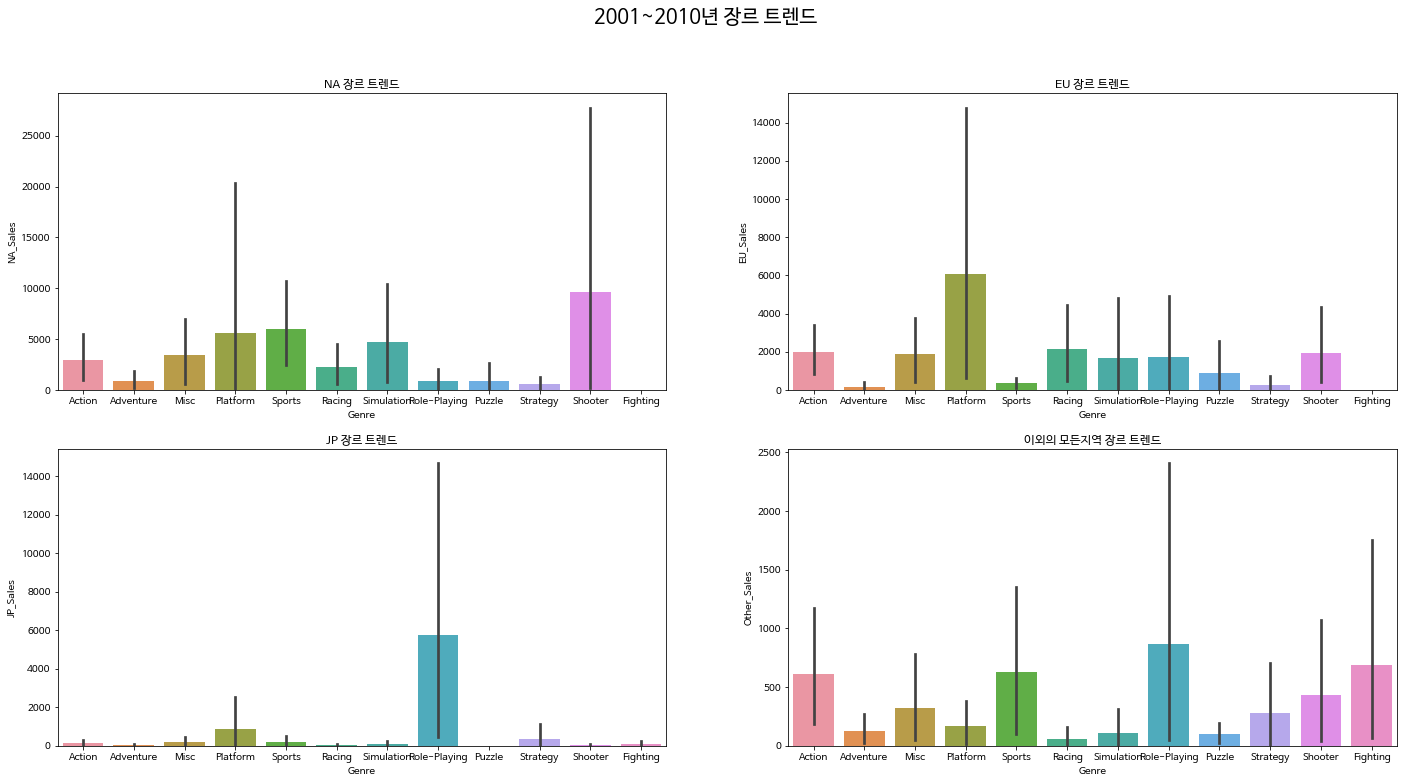

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(24, 12))
plt.suptitle('2001~2010년 장르 트렌드', fontsize=20)
sns.barplot(data=df_year_2010, x='Genre', y='NA_Sales', ax=ax[0, 0])
ax[0, 0].set_title('NA 장르 트렌드')
sns.barplot(data=df_year_2010, x='Genre', y='EU_Sales', ax=ax[0, 1])
ax[0, 1].set_title('EU 장르 트렌드')
sns.barplot(data=df_year_2010, x='Genre', y='JP_Sales', ax=ax[1, 0])
ax[1, 0].set_title('JP 장르 트렌드')
sns.barplot(data=df_year_2010, x='Genre', y='Other_Sales', ax=ax[1, 1])
ax[1, 1].set_title('이외의 모든지역 장르 트렌드')

Text(0.5, 1.0, '모든 지역의 장르 트렌드')

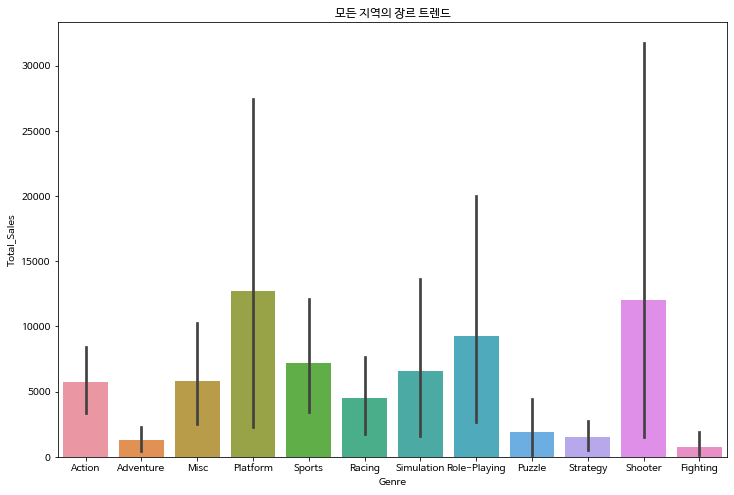

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_year_2010, x='Genre', y='Total_Sales')
plt.title('모든 지역의 장르 트렌드')

**4. 2010년~ 최신**

In [28]:
df_year_2020 = df[(df['Year'] > 2010)]
df_year_2020

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
17,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
18,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05
23,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...
16522,Captain Morgane and the Golden Turtle,DS,2012,Adventure,Reef Entertainment,0.00,0.03,0.00,0.00,0.03
16523,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27
16530,MindJack,PS3,2011,Shooter,Square Enix,0.07,0.08,0.00,0.03,0.18
16537,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


Text(0.5, 1.0, '이외의 모든지역 장르 트렌드')

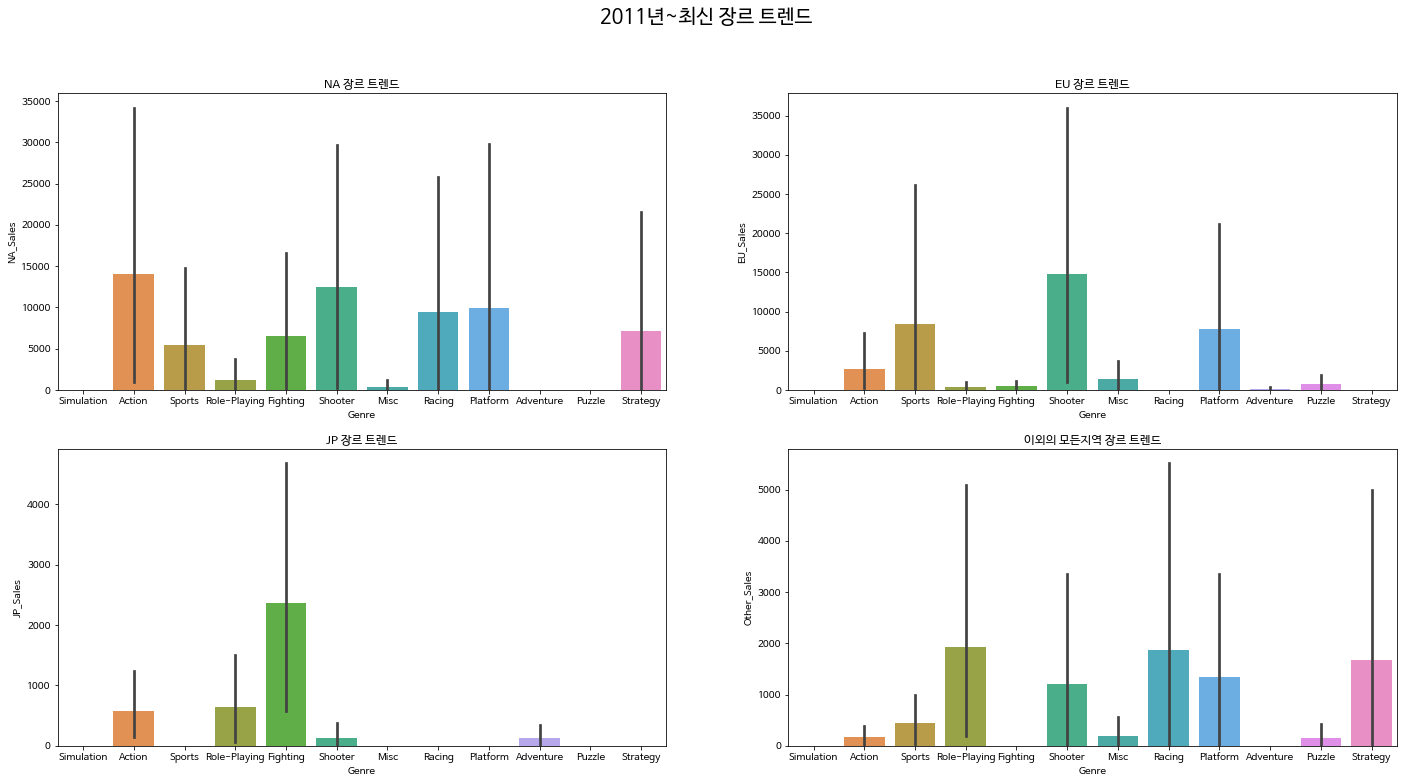

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(24, 12))
plt.suptitle('2011년~최신 장르 트렌드', fontsize=20)
sns.barplot(data=df_year_2020, x='Genre', y='NA_Sales', ax=ax[0, 0])
ax[0, 0].set_title('NA 장르 트렌드')
sns.barplot(data=df_year_2020, x='Genre', y='EU_Sales', ax=ax[0, 1])
ax[0, 1].set_title('EU 장르 트렌드')
sns.barplot(data=df_year_2020, x='Genre', y='JP_Sales', ax=ax[1, 0])
ax[1, 0].set_title('JP 장르 트렌드')
sns.barplot(data=df_year_2020, x='Genre', y='Other_Sales', ax=ax[1, 1])
ax[1, 1].set_title('이외의 모든지역 장르 트렌드')

Text(0.5, 1.0, '모든 지역의 장르 트렌드')

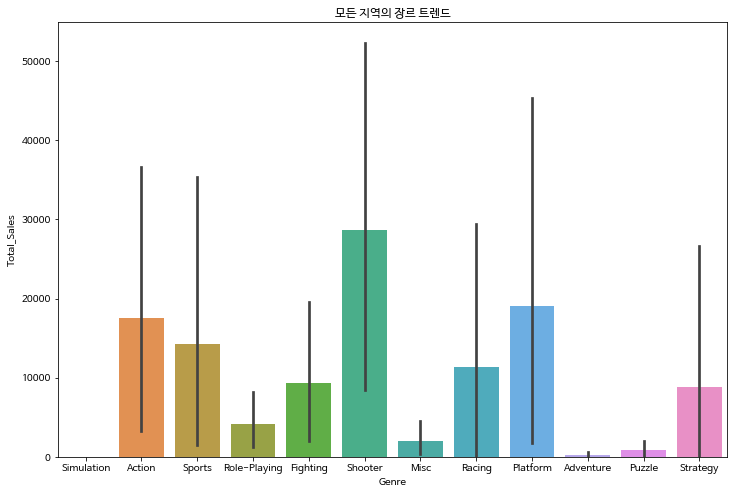

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_year_2020, x='Genre', y='Total_Sales')
plt.title('모든 지역의 장르 트렌드')

* 결론: 시간이 지남에 따라 각기 다른 장르가 인기를 끌고 있으며 최근에는 **`Shooter`**와 **`Action`**, **`Platform`**이 가장 선호하는 장르로 판단된다.    
특히, **`Platform`**은 예전부터 지금까지 변함없이 선호하고 있어 게임 설계 시 좋은 결과를 나타내 줄 것이다.

### 게임별 매출 순위

In [31]:
# 오름차순으로 정렬
rank_df = df.sort_values('Total_Sales')

# 게임 매출 top20
rank_df.sort_values('Total_Sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
10880,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.00,5.31,0.06,1.38,9630006.75
12559,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7030000.00,1.98,0.08,0.78,7030002.84
576,Mario Kart 64,N64,1996,Racing,Nintendo,5550000.00,1.94,2.23,0.15,5550004.32
1965,Pokemon X/Pokemon Y,3DS,2013,Action,Nintendo,5170000.00,4.05,4.34,0.79,5170009.18
1958,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100000.00,1.89,1.45,0.16,4100003.50
1806,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3150000.00,0.35,3150007.34
8507,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3120000.00,0.59,3120011.52
9799,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2930000.00,1.25,0.83,0.20,2930002.28
7843,FIFA 14,X360,2013,Sports,Electronic Arts,0.92,2930000.00,0.01,0.46,2930001.39
6437,Super Mario 64,N64,1996,Platform,Nintendo,6.91,2850000.00,1.91,0.23,2850009.05


Text(0.5, 1.0, '매출 top20')

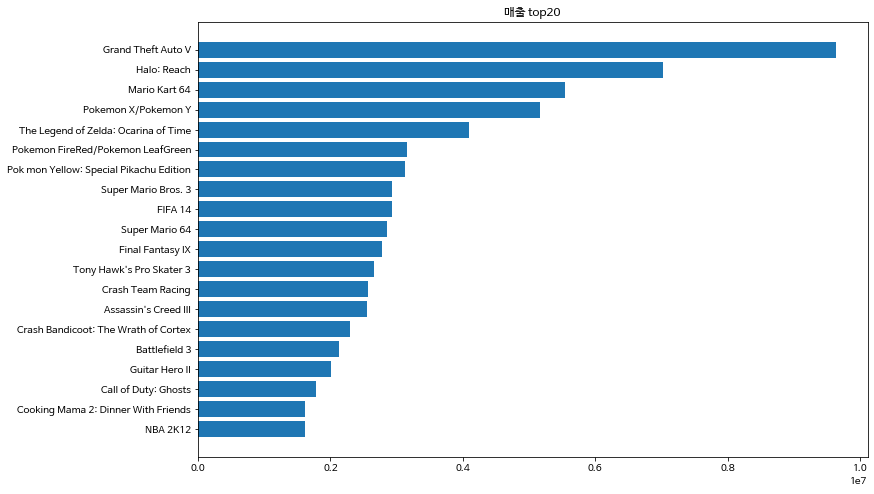

In [32]:
plt.figure(figsize=(12, 8))
plt.barh(y=rank_df['Name'].tail(20), width=rank_df['Total_Sales'].tail(20))
plt.title('매출 top20')

In [ ]:
# 액션 장르에 대한 데이터 생성
# 오름차순으로 정렬
df_act = df[df['Genre'] == 'Action'].sort_values('Total_Sales')

# 액션 매출 top10
df_act.sort_values('Total_Sales', ascending=False).head(10)

Text(0.5, 1.0, '액션 매출 top10')

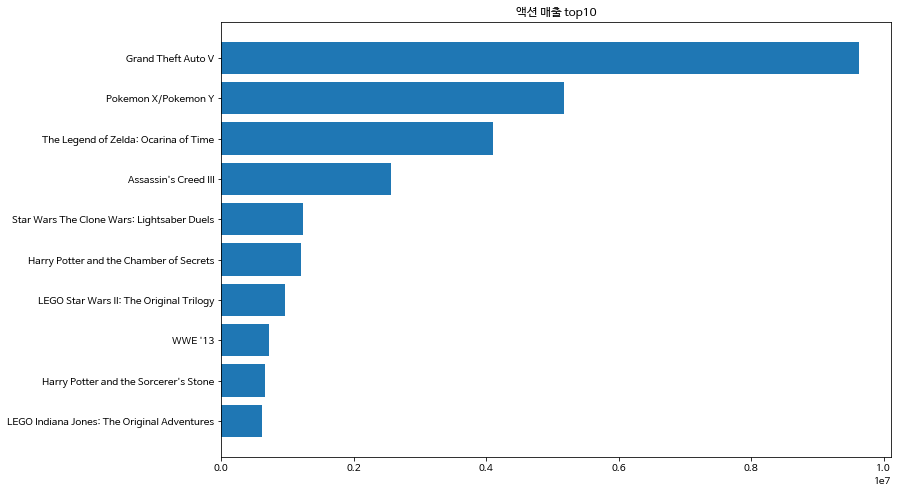

In [34]:
plt.figure(figsize=(12, 8))
plt.barh(y=df_act['Name'].tail(10), width=df_act['Total_Sales'].tail(10))
plt.title('액션 매출 top10')

In [ ]:
# 플랫폼 장르에 대한 데이터 생성
# 오름차순으로 정렬
df_plat = df[df['Genre'] == 'Platform'].sort_values('Total_Sales')

# 플랫폼 매출 top10
df_plat.sort_values('Total_Sales', ascending=False).head(10)

Text(0.5, 1.0, '플랫폼 매출 top10')

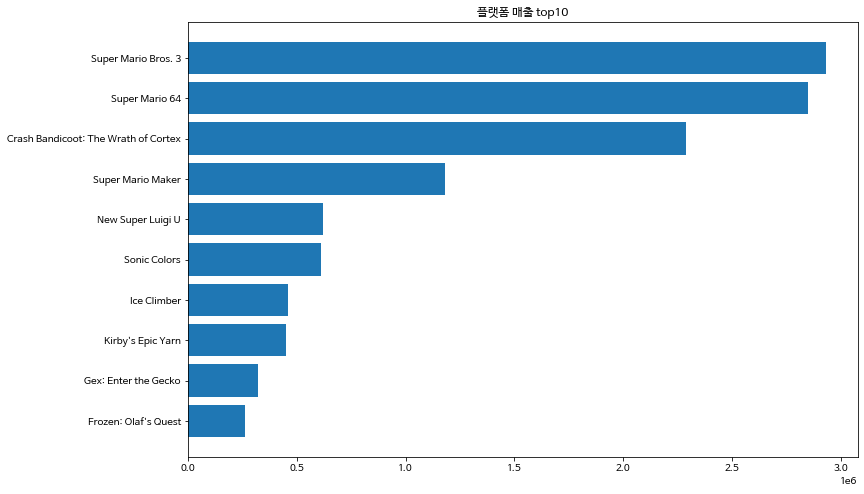

In [36]:
plt.figure(figsize=(12, 8))
plt.barh(y=df_plat['Name'].tail(10), width=df_plat['Total_Sales'].tail(10))
plt.title('플랫폼 매출 top10')

In [ ]:
# 슈팅 장르에 대한 데이터 생성
# 오름차순으로 정렬
df_shoot = df[df['Genre'] == 'Shooter'].sort_values('Total_Sales')

# 슈팅 매출 top10
df_shoot.sort_values('Total_Sales', ascending=False).head(10)

Text(0.5, 1.0, '슈팅 매출 top10')

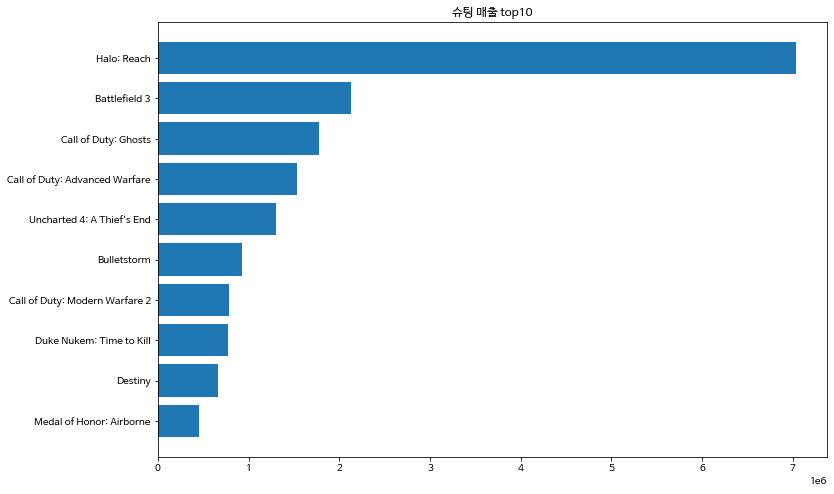

In [38]:
plt.figure(figsize=(12, 8))
plt.barh(y=df_shoot['Name'].tail(10), width=df_shoot['Total_Sales'].tail(10))
plt.title('슈팅 매출 top10')

In [ ]:
# 스포츠 장르에 대한 데이터 생성
# 오름차순으로 정렬
df_sport = df[df['Genre'] == 'Sports'].sort_values('Total_Sales')

# 스포츠 매출 top10
df_sport.sort_values('Total_Sales', ascending=False).head(10)

Text(0.5, 1.0, '스포츠 매출 top10')

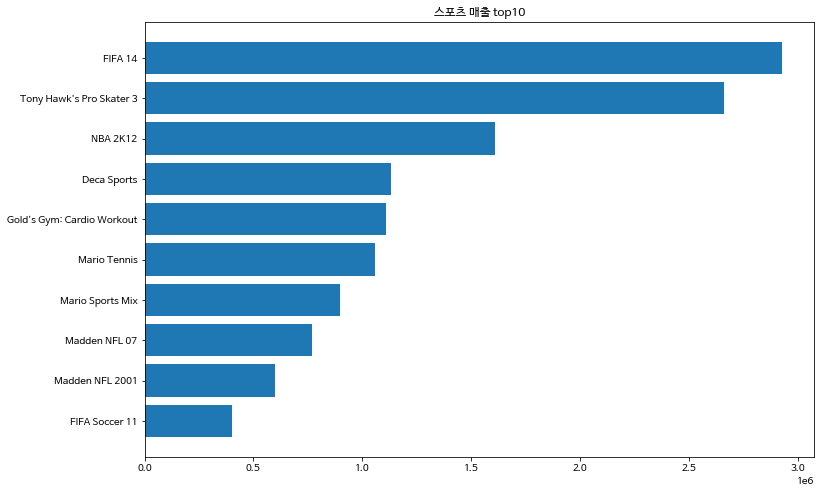

In [40]:
plt.figure(figsize=(12, 8))
plt.barh(y=df_sport['Name'].tail(10), width=df_sport['Total_Sales'].tail(10))
plt.title('스포츠 매출 top10')

### 연도별 게임이 지원되는 플랫폼 현황

Text(0.5, 1.0, '2010~ 최신 플랫폼별 지원되는 게임 수')

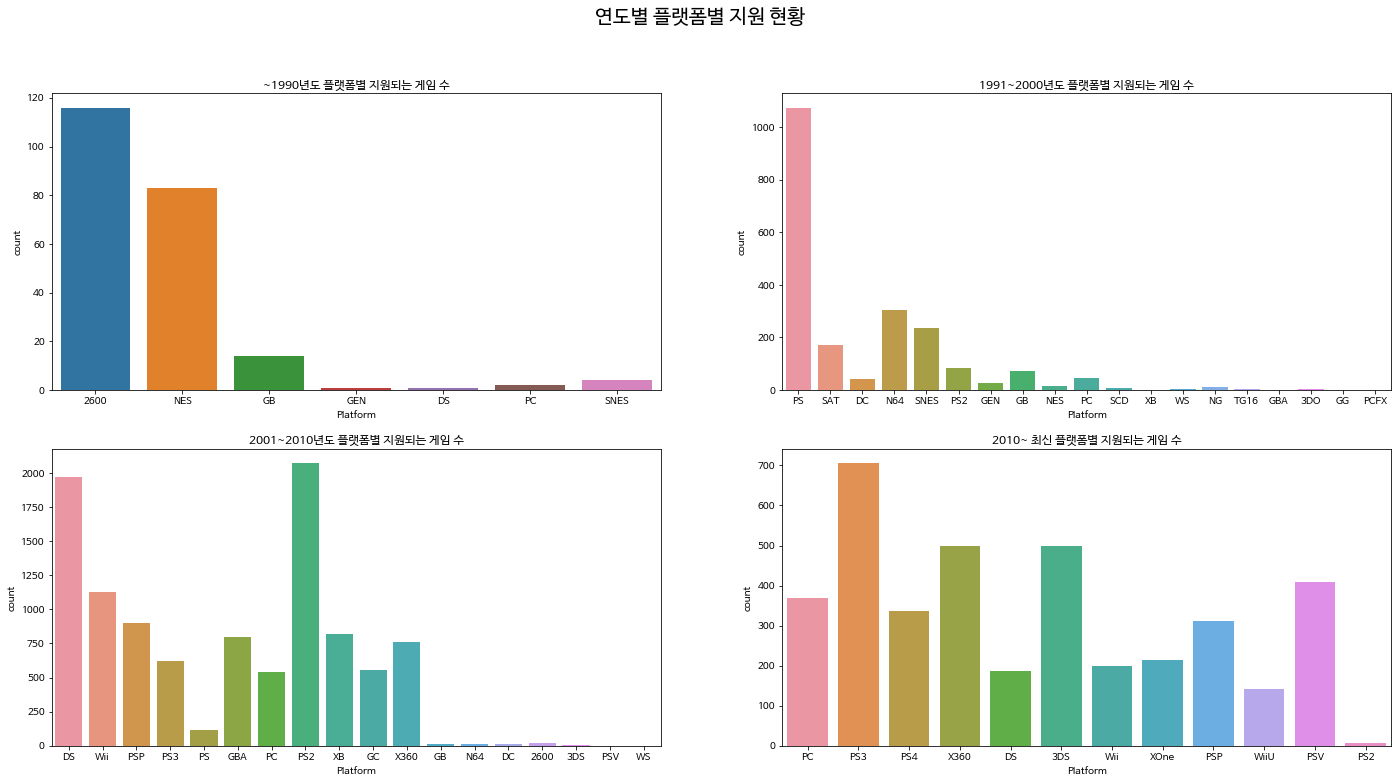

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(24, 12))
plt.suptitle('연도별 플랫폼별 지원 현황', fontsize=20)
sns.countplot(x="Platform", data=df_year_90, ax=ax[0, 0])
ax[0, 0].set_title('~1990년도 플랫폼별 지원되는 게임 수')
sns.countplot(x="Platform", data=df_year_2000, ax=ax[0, 1])
ax[0, 1].set_title('1991~2000년도 플랫폼별 지원되는 게임 수')
sns.countplot(x="Platform", data=df_year_2010, ax=ax[1, 0])
ax[1, 0].set_title('2001~2010년도 플랫폼별 지원되는 게임 수')
sns.countplot(x="Platform", data=df_year_2020, ax=ax[1, 1])
ax[1, 1].set_title('2010~ 최신 플랫폼별 지원되는 게임 수')